In [1]:
import ldpc_graph_refactor as ldpc
from comsys import ComSys
import numpy as np
import gaussian_channel
import parity_matrix
import pandas as pd
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

In [2]:
import random
random.seed(20)

(429, 1001)

In [5]:
H=parity_matrix.from_csv("graph.csv")

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Rodar em paralelo a extração

In [10]:
def process(snr):
    y=np.zeros((10,1001))
    graph=ldpc.from_matrix(H,25)
    #graph=ldpc_graph.LDPC_Graph(H,25)
    channel = gaussian_channel.Gaussian_Channel(snr)
    sys=ComSys(channel,graph)
    return snr,sys(y)
probs_snr = Parallel(n_jobs=10)(delayed(process)(snr) for snr in np.arange(0,5.1,0.5))

## Plotar resultado

In [25]:
snrs = [p[0] for p in probs_snr]
probs = [p[1] for p in probs_snr]

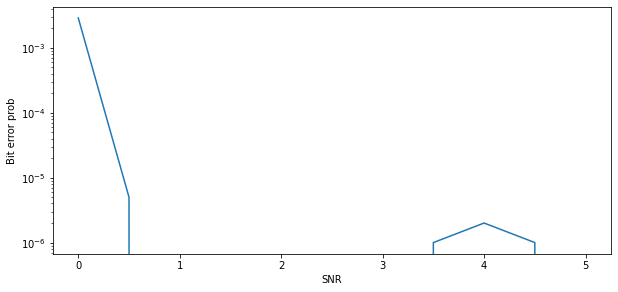

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(snrs, probs)
ax.set_ylabel('Bit error prob')
ax.set_xlabel('SNR')
ax.set_yscale('log')
fig;